# Explore here

In [5]:
import pandas as pd

df = pd.read_csv("../data/raw/AB_NYC_2019.csv")
df.shape


(48895, 16)

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
missing = df.isna().mean().sort_values(ascending=False)
missing.head(15)

last_review                       0.205583
reviews_per_month                 0.205583
host_name                         0.000429
name                              0.000327
neighbourhood_group               0.000000
neighbourhood                     0.000000
id                                0.000000
host_id                           0.000000
longitude                         0.000000
latitude                          0.000000
room_type                         0.000000
price                             0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
calculated_host_listings_count    0.000000
dtype: float64

In [9]:
df.duplicated().sum(), df["id"].duplicated().sum()

(np.int64(0), np.int64(0))

In [11]:
import pandas as pd

df["name"] = df["name"].fillna("Unknown")
df["host_name"] = df["host_name"].fillna("Unknown")

df["last_review"] = pd.to_datetime(df["last_review"], errors="coerce")


df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

df = df[df["price"] > 0]
df = df[df["minimum_nights"] > 0]

df.isna().mean().sort_values(ascending=False).head(10)


last_review            0.205609
id                     0.000000
host_id                0.000000
name                   0.000000
neighbourhood_group    0.000000
neighbourhood          0.000000
latitude               0.000000
host_name              0.000000
longitude              0.000000
room_type              0.000000
dtype: float64

In [13]:
import os

os.makedirs("../data/processed", exist_ok=True)
df.to_csv("../data/processed/AB_NYC_2019_processed.csv", index=False)

df.shape

(48884, 16)

In [14]:
print("shape:", df.shape)
print("\nMissing % (top 10):")
print("\nMissing % (top 10):")

print("\nDuplicados (filas completas):", df.duplicated().sum())
print("Duplicados en 'id':", df["id"].duplicated().sum())

print("\nDtypes:")
display(df.dtypes)

shape: (48884, 16)

Missing % (top 10):

Missing % (top 10):

Duplicados (filas completas): 0
Duplicados en 'id': 0

Dtypes:


id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                         object
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [15]:
num_cols = df.select_dtypes(include="number").columns
display(df[num_cols].describe(percentiles=[.5,.9,.95,.99]).T)

,count,mean,std,min,50%,90%,95%,99%,max
id,48884.0,1.901679e+07,1.098432e+07,2539.00000,1.967574e+07,3.399187e+07,3.525934e+07,3.623891e+07,3.648724e+07
host_id,48884.0,6.762203e+07,7.861666e+07,2438.00000,3.079257e+07,2.128507e+08,2.417652e+08,2.677137e+08,2.743213e+08
latitude,48884.0,4.072895e+01,5.453177e-02,40.49979,4.072308e+01,4.080489e+01,4.082564e+01,4.086466e+01,4.091306e+01
longitude,48884.0,-7.395218e+01,4.615874e-02,-74.24442,-7.395569e+01,-7.390781e+01,-7.386575e+01,-7.377690e+01,-7.371299e+01
price,48884.0,1.527551e+02,2.401703e+02,10.00000,1.060000e+02,2.690000e+02,3.550000e+02,7.990000e+02,1.000000e+04
minimum_nights,48884.0,7.029887e+00,2.051222e+01,1.00000,3.000000e+00,2.800000e+01,3.000000e+01,4.500000e+01,1.250000e+03
number_of_reviews,48884.0,2.327199e+01,4.455133e+01,0.00000,5.000000e+00,7.000000e+01,1.140000e+02,2.140000e+02,6.290000e+02
calculated_host_listings_count,48884.0,7.144628e+00,3.295619e+01,1.00000,1.000000e+00,5.000000e+00,1.500000e+01,2.320000e+02,3.270000e+02
availability_365,48884.0,1.127795e+02,1.316273e+02,0.00000,4.500000e+01,3.370000e+02,3.590000e+02,3.650000e+02,3.650000e+02


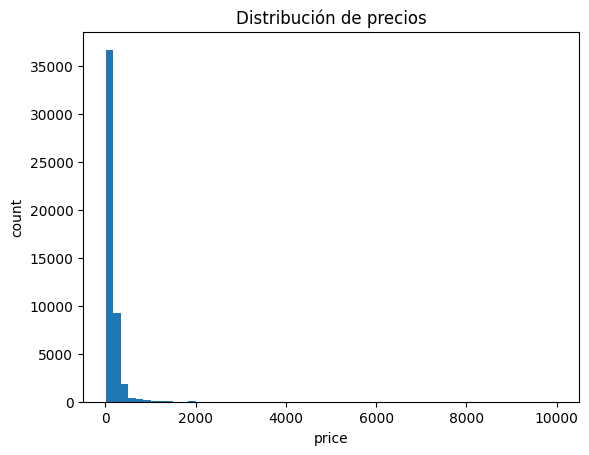

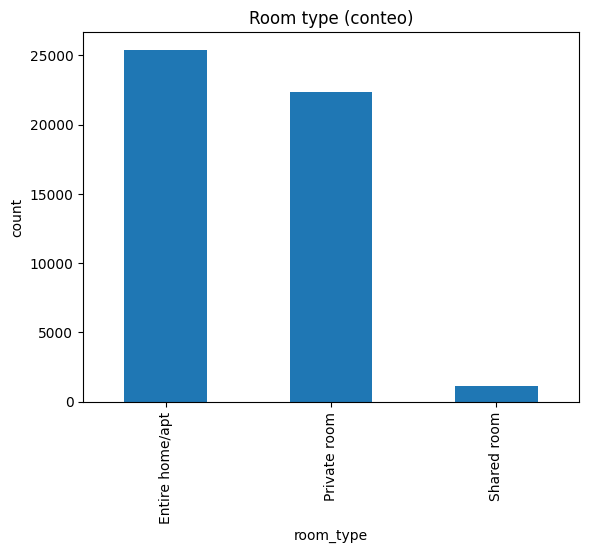

In [17]:
import matplotlib.pyplot as plt

df["price"].plot(kind="hist", bins=60)
plt.title("Distribución de precios")
plt.xlabel("price")
plt.ylabel("count")
plt.show()

df["room_type"].value_counts().plot(kind="bar")
plt.title("Room type (conteo)")
plt.xlabel("room_type")
plt.ylabel("count")
plt.show()

In [18]:
display(df.groupby("neighbourhood_group")["price"].agg(["count","mean","median"]).sort_values("mean", ascending=False))

min_listings = 100
tmp = df.groupby("neighbourhood")["price"].agg(["count","mean"]).query("count >= @min_listings").sort_values("mean", ascending=False)
display(tmp.head(10))

,count,mean,median
neighbourhood_group,,,
Manhattan,21660,196.884903,150.0
Brooklyn,20095,124.438915,90.0
Staten Island,373,114.812332,75.0
Queens,5666,99.517649,75.0
Bronx,1090,87.577064,65.0


,count,mean
neighbourhood,,
Tribeca,177,490.638418
SoHo,358,287.103352
Midtown,1545,282.719094
West Village,768,267.682292
Greenwich Village,392,263.405612
Chelsea,1113,249.738544
Theater District,288,248.013889
Nolita,253,230.138340
Financial District,744,225.490591


limpieza
-name y host_name: se imputan con "unknown" por ser campos desciptivos (texto) y su ausencia no impide el análisis

-last_review: se convierte a tipo fecha. Los Nat se mantienen porque representan "sin reviews".

-reviews_per_month: se imputa a 0 porque si no hay reviews, la tasa mensual razonable es de 0.

-Filtrado: se eliminan riesgos con price <= 0 y minimun_nights <= 0 por ser valires invalidos para el dominio del problema.

In [19]:
import os
os.makedirs("../data/processed", exist_ok=True)
df.to_csv("../data/processed/AB_NYC_2019_processed.csv", index=False)

print("Exportado:", "../data/processed/AB_NYC_2019_processed.csv")
print("shape final:", df.shape)


Exportado: ../data/processed/AB_NYC_2019_processed.csv
shape final: (48884, 16)
